### Auto regressor

This notebook shows how to use auto_regressor.py, a very simple Python function that allows the user to fit an OLS with lagged variables.

**Model Selection:** the function automatically finds the best model available for the specified (lags of) variables. More specifically, for a given set of variables (y and set of X), the code does backward selection: remove the (lag of) variable with the highest p-value, then re-run the model, remove the least significant variable. This process is repeated until the p-values of all (lags of) variables are below the specified threshold (*p_cutoff* default is 0.05).

**...across multiple splits of the data:** to ensure that model selection is robust, the model is fit across multiple sub-samples ('splits') of the data. This means that the model is fitted separately for each split. Please note that the data is split before lags are added to avoid look-ahead bias. 

Each split is divided into a 'training set', on which the model is fitted as well as a 'test set', on which the model is tested (but not fitted). *train_share* is 0.8 by default. 

**The output of the function is the following (in order of output):**
1. Out-of-sample model performance across splits: R2, MAE, MSE, RMSE, start date and end date
2. A Pandas dataframe with the out-of-sample values across each split. This allows us to answer: how well does the model perform out-of-sample across different periods?
3. Model summary for each training split as well as the full sample: coefficients etc.
4. A Pandas dataframe that contains the model from each split, *fitted to the* **full dataset**. This answers the question: how well does a model fit on 2010-2015 data perform during 2021-2023?

# Load and import

In [55]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer, LineLocation
from IPython.display import display  # Make sure this import is at the top of your script

from auto_regressor_jan2024 import one_stop_analysis, exploratory_analysis, load_df, remove_colinear_features

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Use the function and get the output

## First, set the parameters:

In [3]:
file_location = "uk_data.csv"
lags = 2
splits = 3
train_share = 0.8
p_cutoff = 0.05

y is set to gdp, the first column of the dataset. To change this, please change the first column of the dataset.
Removing colinear features...
Done removing colinear features.
No features were removed due to high collinearity.
Target variable selected: gdp


,gdp,retail_sales,wage_growth
gdp,1.000000,0.752207,0.143151
retail_sales,0.752207,1.000000,0.145020
wage_growth,0.143151,0.145020,1.000000


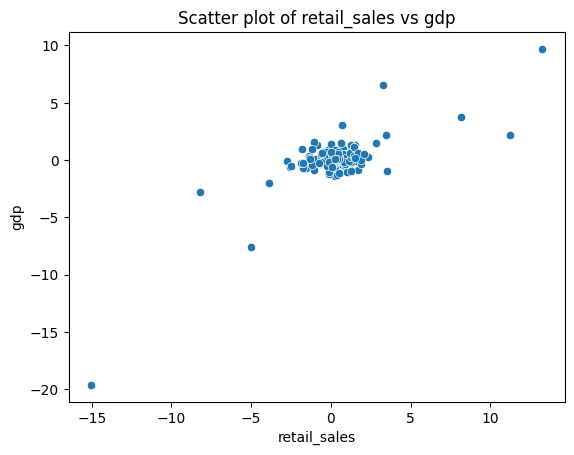

Spearman's correlation between retail_sales and gdp: nan
P-value: nan
No strong evidence of non-linear relationship for retail_sales.



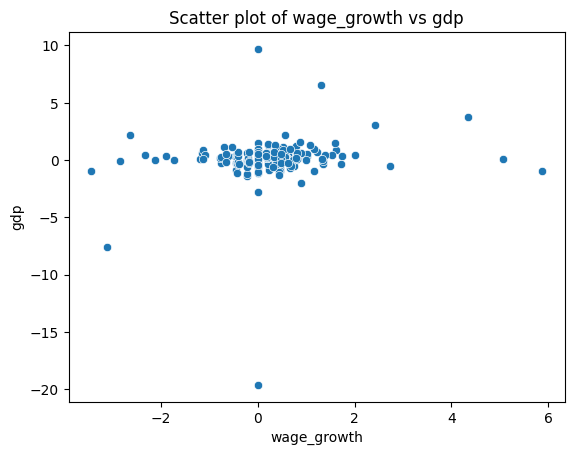

Spearman's correlation between wage_growth and gdp: nan
P-value: nan
No strong evidence of non-linear relationship for wage_growth.

Each split is assigned a unique ID. The ID is a random two-character string with one letter + one number.


TypeError: unhashable type: 'list'

In [22]:
one_stop_analysis(file_location="uk_data.csv")


In [127]:
#### df = load_df(file_location)

df = remove_colinear_features(df)
df.head()

Removing colinear features...
Done removing colinear features.
No features were removed due to high collinearity.


,gdp,retail_sales,wage_growth
date,,,
2005-01-31,0.876095,1.244168,1.608579
2005-02-28,0.000000,-0.614439,-2.110818
2005-03-31,-0.372208,-0.154560,1.347709
2005-04-30,1.245330,0.000000,0.797872
2005-05-31,-0.369004,-0.619195,0.263852


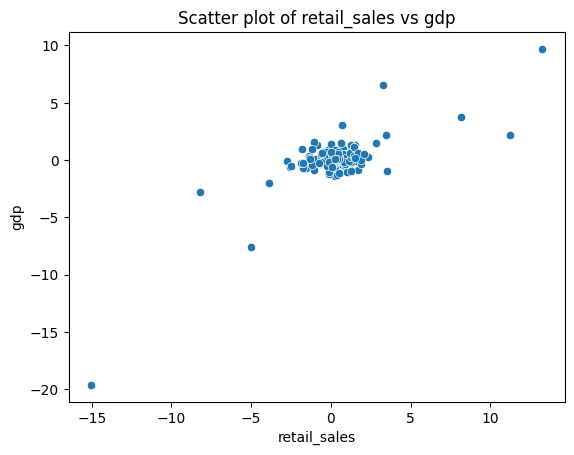

Spearman's correlation between retail_sales and gdp: nan
P-value: nan
No strong evidence of non-linear relationship for retail_sales.



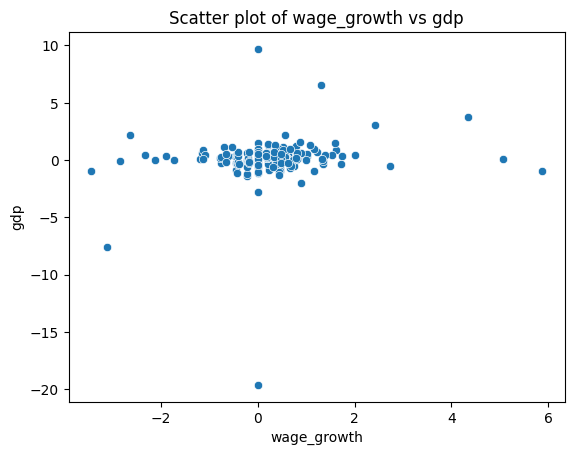

Spearman's correlation between wage_growth and gdp: nan
P-value: nan
No strong evidence of non-linear relationship for wage_growth.



In [128]:
exploratory_analysis(df, target_variable = "gdp")

In [129]:
df_splits = create_splits(df = df, lags = lags, train_share = train_share)
df_splits

Each split is assigned a unique ID. The ID is a random two-character string with one letter + one number.


{'split_H5': {'train_split_H5':                  gdp  retail_sales  wage_growth  gdp_lag1  retail_sales_lag1  \
  date                                                                           
  2005-03-31 -0.372208     -0.154560     1.347709  0.000000          -0.614439   
  2005-04-30  1.245330      0.000000     0.797872 -0.372208          -0.154560   
  2005-05-31 -0.369004     -0.619195     0.263852  1.245330           0.000000   
  2005-06-30  0.617284      0.778816     0.000000 -0.369004          -0.619195   
  2005-07-31  0.368098      0.154560     0.789474  0.617284           0.778816   
  2005-08-31  0.000000     -0.462963     0.783290  0.368098           0.154560   
  2005-09-30  0.611247      0.310078     0.259067  0.000000          -0.462963   
  2005-10-31 -0.364520      0.618238     0.258398  0.611247           0.310078   
  2005-11-30  1.097561      0.614439     0.515464 -0.364520           0.618238   
  2005-12-31  0.844391     -0.152672     0.000000  1.097561         

## Now run the function

In [130]:
reg_df = regression_OLS(df_splits, p_cutoff=0.05)

In [124]:
reg_df

{'split_K7': {'data': {'train_split_K7':                  gdp  retail_sales  wage_growth  gdp_lag1  retail_sales_lag1  \
   date                                                                           
   2005-03-31 -0.372208     -0.154560     1.347709  0.000000          -0.614439   
   2005-04-30  1.245330      0.000000     0.797872 -0.372208          -0.154560   
   2005-05-31 -0.369004     -0.619195     0.263852  1.245330           0.000000   
   2005-06-30  0.617284      0.778816     0.000000 -0.369004          -0.619195   
   2005-07-31  0.368098      0.154560     0.789474  0.617284           0.778816   
   2005-08-31  0.000000     -0.462963     0.783290  0.368098           0.154560   
   2005-09-30  0.611247      0.310078     0.259067  0.000000          -0.462963   
   2005-10-31 -0.364520      0.618238     0.258398  0.611247           0.310078   
   2005-11-30  1.097561      0.614439     0.515464 -0.364520           0.618238   
   2005-12-31  0.844391     -0.152672     0.00000

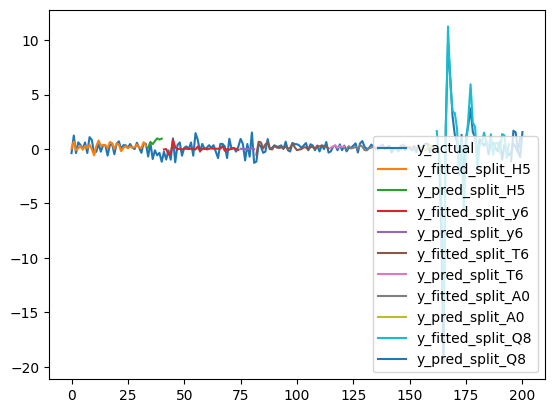

In [133]:
fit_and_predict(reg_df).plot();

The below output summarizes which (lags of) variables matter across which sub-sample as well as the full sample. 

In [4]:
df[0]

The below cell summarizes the out-of-sample performance across each of the splits. 

In [5]:
df[1]

,Sample 1,Sample 2,Sample 3
R2,-0.0322,-0.0457,-0.5044
Mae,0.4317,0.2318,0.5028
Mse,0.3160,0.0815,0.3941
Rmse,0.5621,0.2854,0.6278
Start Date,31/12/2009,29/02/2016,31/03/2022
End Date,28/02/2011,30/04/2017,30/04/2023


The below cell contains the dataframe with the out-of-sample predictions summarized above. 

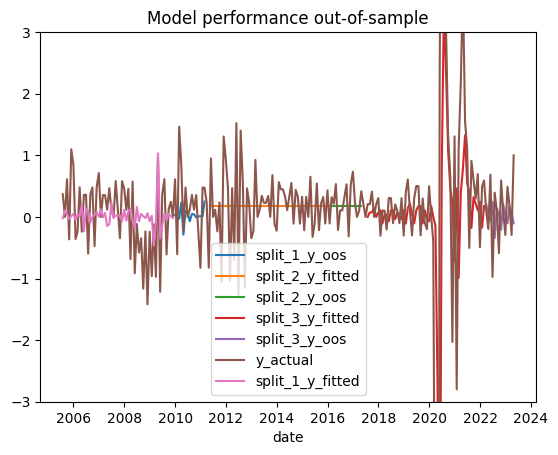

In [6]:
df[2].plot()
plt.ylim(-3, 3)
plt.title('Model performance out-of-sample');    

We apply each of the models (each fitted using their given split of data) to the full dataset (in-sample and out-of-sample, ie a mix of fitted and predicted values). 

Columns:
- The "y_fitted_ave" averages the fitted/predicted values.
- y_full_fitted is based on fitting the model to the full dataframe. This means that all the values shown are in-sample. Do not use these values for prediction. 
- "y" is the actual y value

In [7]:
df[3].tail()

,split_2_y_fitted,split_3_y_fitted,y_fitted_ave,y,y_full_fitted,split_1_y_fitted
date,,,,,,
2023-01-31,0.179872,-0.103939,0.037967,0.490677,-0.092126,0.022980
2023-02-28,0.179872,0.173742,0.176807,0.195312,0.153996,0.022872
2023-03-31,0.179872,0.069157,0.124515,-0.292398,0.061298,0.065072
2023-04-30,0.179872,-0.103534,0.038169,1.000000,-0.091767,0.016447
2023-05-31,0.179872,0.354085,0.266979,NaN,0.313844,0.035408


In [24]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer, LineLocation

from auto_regressor import data_preparation_splits, regression_OLS, full_df

from auto_regressor_v3 import load_df, create_lags, create_splits



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
df = load_df("uk_data.csv")

In [26]:
df2 = create_splits(df=df)

In [27]:
df2["split_1"]['split_1_train']

,gdp,wage_growth,gdp_lag1,wage_growth_lag1,gdp_lag2,wage_growth_lag2,gdp_lag3,wage_growth_lag3,gdp_lag4,wage_growth_lag4,gdp_lag5,wage_growth_lag5
date,,,,,,,,,,,,
2005-06-30,0.617284,0.000000,-0.369004,0.263852,1.245330,0.797872,-0.372208,1.347709,0.000000,-2.110818,0.876095,1.608579
2005-07-31,0.368098,0.789474,0.617284,0.000000,-0.369004,0.263852,1.245330,0.797872,-0.372208,1.347709,0.000000,-2.110818
2005-08-31,0.000000,0.783290,0.368098,0.789474,0.617284,0.000000,-0.369004,0.263852,1.245330,0.797872,-0.372208,1.347709
2005-09-30,0.611247,0.259067,0.000000,0.783290,0.368098,0.789474,0.617284,0.000000,-0.369004,0.263852,1.245330,0.797872
2005-10-31,-0.364520,0.258398,0.611247,0.259067,0.000000,0.783290,0.368098,0.789474,0.617284,0.000000,-0.369004,0.263852
2005-11-30,1.097561,0.515464,-0.364520,0.258398,0.611247,0.259067,0.000000,0.783290,0.368098,0.789474,0.617284,0.000000
2005-12-31,0.844391,0.000000,1.097561,0.515464,-0.364520,0.258398,0.611247,0.259067,0.000000,0.783290,0.368098,0.789474
2006-01-31,-0.358852,0.256410,0.844391,0.000000,1.097561,0.515464,-0.364520,0.258398,0.611247,0.259067,0.000000,0.783290
2006-02-28,-0.240096,0.255754,-0.358852,0.256410,0.844391,0.000000,1.097561,0.515464,-0.364520,0.258398,0.611247,0.259067


In [33]:
df4 = load_df("uk_data.csv")
df4 = create_lags(df4)

In [38]:
df4

,gdp,wage_growth,gdp_lag1,wage_growth_lag1,gdp_lag2,wage_growth_lag2,gdp_lag3,wage_growth_lag3,gdp_lag4,wage_growth_lag4,gdp_lag5,wage_growth_lag5
date,,,,,,,,,,,,
2005-06-30,0.617284,0.000000,-0.369004,0.263852,1.245330,0.797872,-0.372208,1.347709,0.000000,-2.110818,0.876095,1.608579
2005-07-31,0.368098,0.789474,0.617284,0.000000,-0.369004,0.263852,1.245330,0.797872,-0.372208,1.347709,0.000000,-2.110818
2005-08-31,0.000000,0.783290,0.368098,0.789474,0.617284,0.000000,-0.369004,0.263852,1.245330,0.797872,-0.372208,1.347709
2005-09-30,0.611247,0.259067,0.000000,0.783290,0.368098,0.789474,0.617284,0.000000,-0.369004,0.263852,1.245330,0.797872
2005-10-31,-0.364520,0.258398,0.611247,0.259067,0.000000,0.783290,0.368098,0.789474,0.617284,0.000000,-0.369004,0.263852
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,0.490677,0.474684,-0.293542,0.476948,0.097943,0.479233,0.591133,0.805153,-0.587659,0.323102,0.098039,0.814332
2023-02-28,0.195312,0.787402,0.490677,0.474684,-0.293542,0.476948,0.097943,0.479233,0.591133,0.805153,-0.587659,0.323102
2023-03-31,-0.292398,0.625000,0.195312,0.787402,0.490677,0.474684,-0.293542,0.476948,0.097943,0.479233,0.591133,0.805153


In [30]:
df3 = create_splits(df=df, splits=1, train_share = 1)

In [37]:
df3['split_1']['split_1_train']

,gdp,wage_growth,gdp_lag1,wage_growth_lag1,gdp_lag2,wage_growth_lag2,gdp_lag3,wage_growth_lag3,gdp_lag4,wage_growth_lag4,gdp_lag5,wage_growth_lag5
date,,,,,,,,,,,,
2005-06-30,0.617284,0.000000,-0.369004,0.263852,1.245330,0.797872,-0.372208,1.347709,0.000000,-2.110818,0.876095,1.608579
2005-07-31,0.368098,0.789474,0.617284,0.000000,-0.369004,0.263852,1.245330,0.797872,-0.372208,1.347709,0.000000,-2.110818
2005-08-31,0.000000,0.783290,0.368098,0.789474,0.617284,0.000000,-0.369004,0.263852,1.245330,0.797872,-0.372208,1.347709
2005-09-30,0.611247,0.259067,0.000000,0.783290,0.368098,0.789474,0.617284,0.000000,-0.369004,0.263852,1.245330,0.797872
2005-10-31,-0.364520,0.258398,0.611247,0.259067,0.000000,0.783290,0.368098,0.789474,0.617284,0.000000,-0.369004,0.263852
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-31,0.490677,0.474684,-0.293542,0.476948,0.097943,0.479233,0.591133,0.805153,-0.587659,0.323102,0.098039,0.814332
2023-02-28,0.195312,0.787402,0.490677,0.474684,-0.293542,0.476948,0.097943,0.479233,0.591133,0.805153,-0.587659,0.323102
2023-03-31,-0.292398,0.625000,0.195312,0.787402,0.490677,0.474684,-0.293542,0.476948,0.097943,0.479233,0.591133,0.805153
